<a href="https://colab.research.google.com/github/brunoodon/11-forum-csirt/blob/main/MVP_SprintII(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics - Sprint II(B)
### Bruno Odon

# Descrição do problema



É um problema de Classificação, onde o objetivo é ter um modelo preditivo que consiga classificar imagens de instrumentos musicais segundo suas catregorias. Serão utilizadas técnicas de Deep Learning para obtenção dos resultados.

## Descrição do dataset:

Este dataset é criado a partir de um banco de imagens de instrumentos musicais a venda.

**Seguem os campos:**

images: o nome do arquivo de imagem

class: o rótulo aplicado a cada imagem

height: altura da imagem

width: largura da imagem

channels: quantidade de canais da imagem

filesize: tamanho do arquivo.





# Preparação dos dados

Primeiramente, vamos instalar e importar as bibliotecas necessárias para o projeto.

In [74]:
!pip install tensorflow
!pip install keras

In [82]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as skm
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import re

Como o volume de dados é grande, o dataset foi armazenado em formato ZIP e, na sequência, descompactado para este diretório.

In [78]:
!mkdir -pv datasets/music
!wget 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip' -P datasets/

--2023-07-20 21:43:55--  https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/music.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10632185 (10M) [application/zip]
Saving to: ‘datasets/music.zip.11’

music.zip.11        100%[===================>]  10.14M  --.-KB/s    in 0.1s    

2023-07-20 21:43:55 (103 MB/s) - ‘datasets/music.zip.11’ saved [10632185/10632185]



In [80]:
import zipfile
dataset = 'datasets/music.zip'
dest = 'datasets/music/'
with zipfile.ZipFile(dataset,'r') as zip_ref:
  zip_ref.extractall(dest)

In [81]:
#verificando o número de imagens que foram extraídas
path='datasets/music/'
print(f"Temos um total de {len(os.listdir(path))} imagens em nosso dataset")

#exemplos de algumas imagens extraídas
print(f"Primeiras 20 imagens: \n {os.listdir(path)[:20]}")


Temos um total de 2596 imagens em nosso dataset
Primeiras 20 imagens: 
 ['1634117972100_Guitar Back Amp with Powered Pa System for sale.jpg', '1634112498970_BOYA BYWHM8 Pro Wireless Handheld Microphone for sale.jpg', '1634112358159_Pioneer EFX500 DJ Effects ControllerJAPAN for sale.jpg', '1634118001273_Boya M1DM Dual Mic for sale.jpg', '1634111157863_YAMAHA Piano for sale.jpg', '1634112841166_Dj Light Stand for sale.jpg', '1634112920947_Guitar for sale.jpg', '1634110584381_Electric Guitar for sale.jpg', '1634117638438_Fiber Dholky for sale.jpg', '1634117578620_Cashio organ for sale.jpg', '1634117867993_Pro instrument cable for sale.jpg', '1634109704493_Saxaphone  Soprano for sale.jpg', '1634110189621_YAMAHA FX900 SIMULEFFECT PROCESSOR for sale.jpg', '1634112802198_Japan Amplifier for sale.jpg', '1634110386536_Professional Studio Recording Microphone Stand Small for sale.jpg', '1634112801953_DJ System for sale.jpg', '1634112953454_Warwick Rockbass Streamer lx 5 Bass Guitar for sale.jpg'

Nem todas as imagens serão utilizadas, pois este dataset contém uma quantidade muito grande de categorias. Vamos inserir no dataset 4 classes de instrumentos.

In [83]:
#obtendo a lista de arquivos do diretório onde foram descompactadas as imagens
images = os.listdir(path)
#criando listas vazias para armazenamento dos dados
labels, heights, widths, channels, filesize, files = [], [], [], [], [], []

#como a quantidade de guitarras é muito maior que a de outros instrumentos, foi criado um contador para controlar a quantidade que será inserida no dataset
guitar_count=0
#loop que percorre as imagens do diretório
for fname in images:
    try:
      def file_settings():
          img_shape = mpimg.imread(path+fname).shape
          heights.append(img_shape[0])
          widths.append(img_shape[1])
          channels.append(img_shape[2])
          filesize.append(os.path.getsize(path+fname))
      #será criada uma variável para armazenar o nome do instrumento, baseando-se no nome de cada imagem
      inst_type = str(fname)[14:].replace('.jpg', '').replace('for sale', '')
      #Primeiramente, será criada uma lista de exclusão de nomes de imagens que podem confundir a criação das classes
      if not "Guitar Amp" or not "amp" or not "Speaker" or not "Cube" or not "pedals" or not "Pedals" or not "Pedal" or not "Preamp" or not "Guitar String" or not "Speaker" or not "Bag" or not "Paddle" in inst_type:
        #aplicando as condições para classificação das imagens
        if ("Amplifier" or "Amp" or "Guitar Amp") in inst_type:
          name = "Amplifier"
          files.append(fname)
          labels.append(name)
          file_settings()
        if "Drums" in inst_type:
          name = "Drums"
          files.append(fname)
          labels.append(name)
          file_settings()
        if "Piano" in inst_type:
          name = "Piano"
          files.append(fname)
          labels.append(name)
          file_settings()
        #como dito anteriormente, foi criado um delimitador para que sejam inseridas no máximo 100 imagens de guitarras, deixando assim o dataset balanceado
        if ("Guitar" or "Guitars" or "GUITAR" or "guitar") in inst_type and guitar_count <= 100 and not "Amplifier" in inst_type:
          guitar_count = guitar_count + 1
          name = "Guitar"
          files.append(fname)
          labels.append(name)
          file_settings()
    except:
      print('Não foi possível determinar a classe da imagem')
# Criação do dataset com as imagens coletadas
df = pd.DataFrame({'images': files, 'class': labels, 'height': heights, 'width': widths, 'channels': channels, 'filesize': filesize})
#aqui o dataset está sendo embaralhado e estão sendo exibidas apenas as suas 20 primeiras linhas
df.sample(frac=1).reset_index(drop=True).head(20)



,images,class,height,width,channels,filesize
0,1634112919011_Chard Guiter Amplifier for sale.jpg,Amplifier,107,142,3,4675
1,1634110457857_HITONE BOSS SSA300FBR PA Amplifi...,Amplifier,107,142,3,2902
2,1634112456643_Bass Guitar Amplifier for sale.jpg,Amplifier,107,142,3,4916
3,1634111080881_Toyama Acoustic Box Guitar for s...,Guitar,107,142,3,6222
4,1634111121285_Bose 550 Amplifier for sale.jpg,Amplifier,107,142,3,3377
5,1634110347964_HITONE BOSS SSB120 PA Amplifier ...,Amplifier,107,142,3,2804
6,1634112671955_TDA7297 Mini Digital Amplifier M...,Amplifier,107,142,3,3432
7,1634112454280_Casio Piano for sale.jpg,Piano,107,142,3,2311
8,1634112137360_Bernstein Piano for sale.jpg,Piano,107,142,3,3689
9,1634110510622_Line 6 Pod HD X3 Guitar Pedal fo...,Guitar,107,142,3,3340


Guitar       101
Amplifier     93
Piano         87
Drums         19
Name: class, dtype: int64


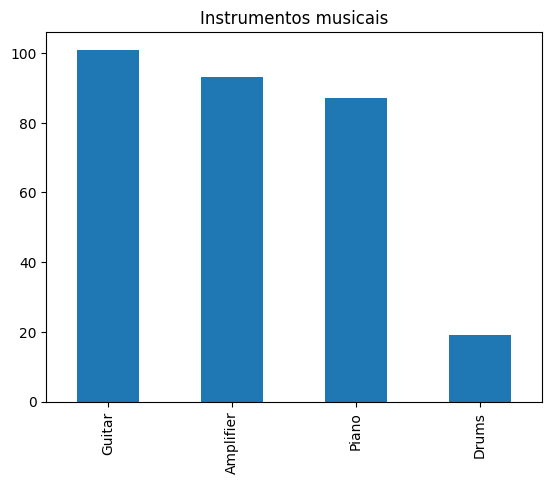

In [84]:
#Visualizando a proporção de imagens por classe
print((df['class']).value_counts())
instruments_count = df['class'].value_counts().plot.bar(title='Instrumentos musicais')

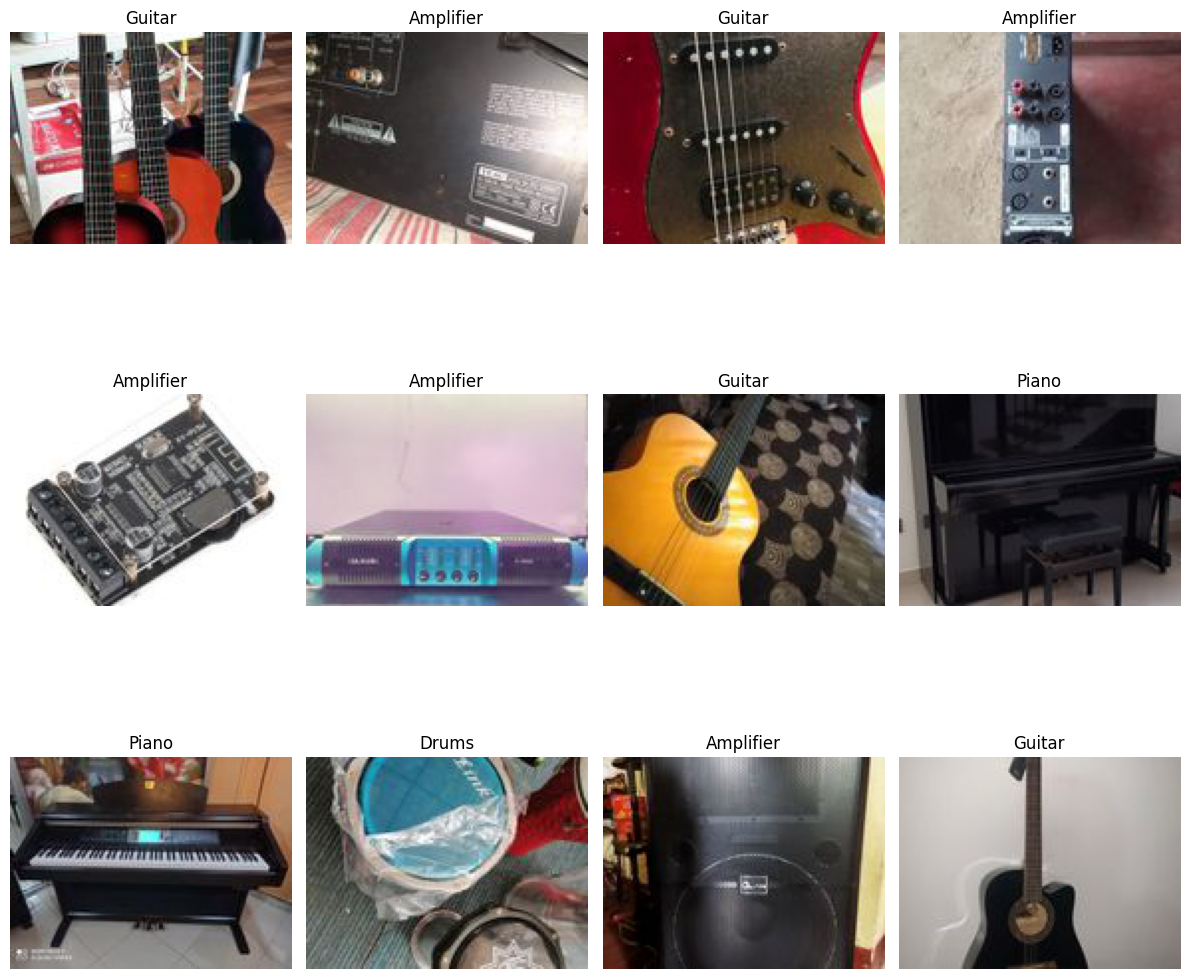

In [85]:
#Exibindo algumas amostras, já com seus respectivos rótulos
import matplotlib.pyplot as plt
from PIL import Image
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)
df_random = df.sample(frac=1).reset_index(drop=True).head(12)
for i, row in df_random.iterrows():
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    classe = row['class']
    img_name = row['images']
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(classe)
plt.tight_layout()
plt.show()

In [88]:
#Dividindo o dataset em 80% para treino e 20% para teste
train, test = train_test_split(df[['images', 'class', 'height', 'width', 'channels', 'filesize']], test_size=0.2, random_state=42, shuffle=True)
#Exibindo a divisão:
print("CONJUNTO DE TREINO")
display(train)
print("CONJUNTO DE TESTE")
display(test)

CONJUNTO DE TREINO


,images,class,height,width,channels,filesize
232,1634118003893_Yamaha M5J Acoustic Piano for sa...,Piano,107,142,3,3777
59,1634113276700_Guitar for sale.jpg,Guitar,107,142,3,2356
6,1634110510622_Line 6 Pod HD X3 Guitar Pedal fo...,Guitar,107,142,3,3340
185,1634117833311_Piano for sale.jpg,Piano,107,142,3,3250
173,1634112410903_Weinberg SU105 Acoustic Piano fo...,Piano,107,142,3,4480
...,...,...,...,...,...,...
188,1634113317218_Piano for sale.jpg,Piano,107,142,3,4160
71,1634112181595_Brand New Classical Guitars for ...,Guitar,107,142,3,2460
106,1634110425298_Acoustic Guitar LQ for sale.jpg,Guitar,107,142,3,4957
270,1634111805988_Power Amplifier for sale.jpg,Amplifier,107,142,3,4860


CONJUNTO DE TESTE


,images,class,height,width,channels,filesize
203,1634112413856_Yamaha U1A Acoustic Piano for sa...,Piano,107,142,3,4473
266,1634111442610_Guitar Amplifier for sale.jpg,Amplifier,107,142,3,3278
152,1634110420848_Amplifier with Speakers for sale...,Amplifier,107,142,3,4900
9,1634112879021_Fender Stratocaster Electric Gui...,Guitar,107,142,3,3557
233,1634111262580_Micro Cube Guitar Amplifier for ...,Amplifier,107,142,3,5062
226,1634112409566_John Broadwood Sons Acoustic Pi...,Piano,107,142,3,3921
196,1634109701378_Clayderman Piano Peterson Cente...,Piano,107,142,3,4657
109,1634111119307_Fender Guitar for sale.jpg,Guitar,107,142,3,3676
5,1634112953454_Warwick Rockbass Streamer lx 5 B...,Guitar,107,142,3,4753
175,1634112412673_Yamaha Clavinova YDP223 Digital ...,Piano,107,142,3,3856


Aqui será utilizada a classe ImageDataGenerator, do TensorFlow, para fazer o redimensionamento das imagens. O **data augmentation** aumenta as imagens e é uma técnica muito importante para ajudar no aprendizado.

In [89]:
#esquema de testes de imagens aumentadas (já com o split de validação)
train_datagen=ImageDataGenerator(validation_split=0.2,
                                 rescale = 1.0/255,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
#esquema de testes de imagens aumentadas
test_datagen=ImageDataGenerator(rescale=1./255)

#criando o conjunto de treino com imagens aumentadas
train_generator=train_datagen.flow_from_dataframe(
    train, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='training' #training set
    )

#criando o conjunto de validação com imagens aumentadas
val_generator=train_datagen.flow_from_dataframe(
    train, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class',
    subset='validation' #validation set
    )
#criando o conjunto de teste com imagens aumentadas
test_generator=test_datagen.flow_from_dataframe(
    test, path,
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical',
    x_col='images',
    y_col='class')

Found 192 validated image filenames belonging to 4 classes.
Found 48 validated image filenames belonging to 4 classes.
Found 60 validated image filenames belonging to 4 classes.


Aqui vamos exibir um exemplo de uma imagem, em várias posições.


Found 1 validated image filenames belonging to 1 classes.


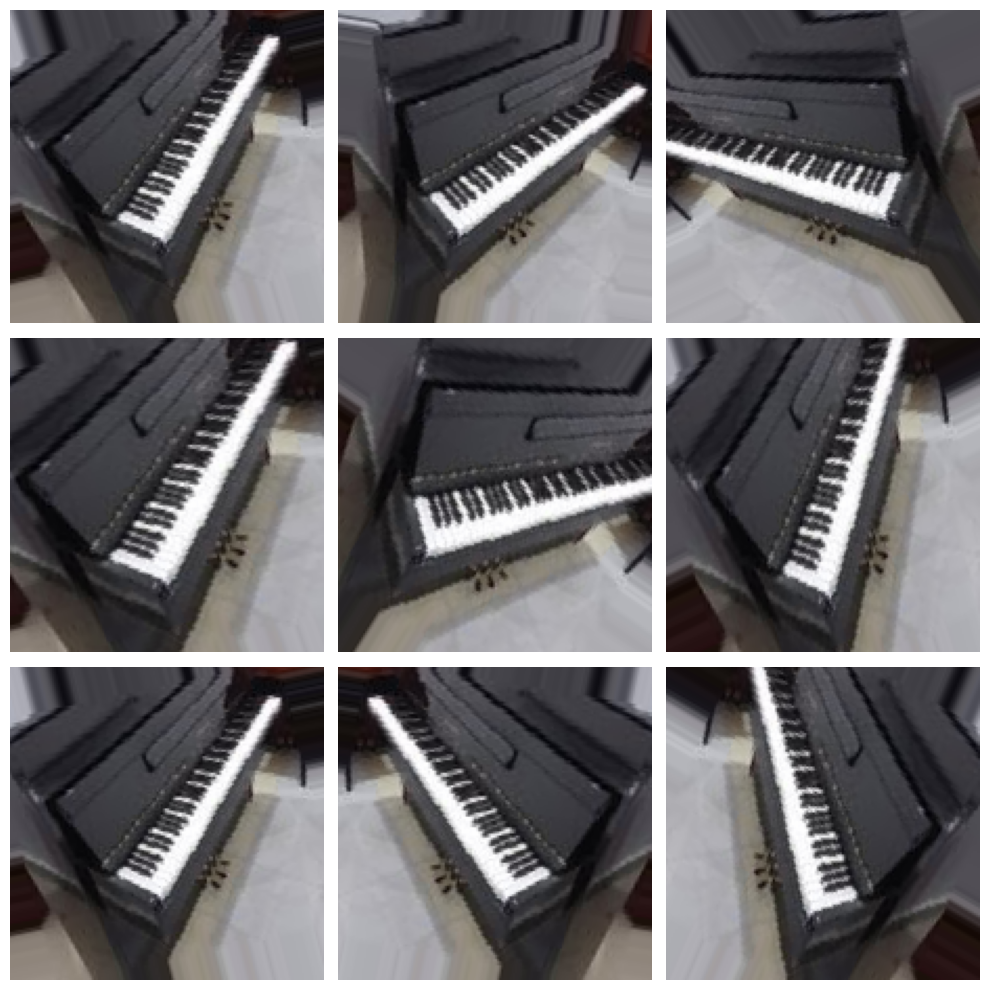

In [93]:
#Coletando um exemplo aleatório do dataset
sample = df.sample(n=1)

#Gerando a imagem
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    path,
    x_col='images',
    y_col='class',
    target_size=(150,150),
    #o tipo de classe é 'categorical', porque temos mais de 2 categorias
    class_mode='categorical'
)

#configurações de exibição da imagem
plt.figure(figsize=(10, 10))
#criando uma lista com 9 posições diferentes para a imagem e exibindo as imagens
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

# Modelagem

Definição da arquitetura do modelo
Aqui é especificada uma camada convolucional 2D que possui 32 filtros, um tamanho de filtro de 3x3 que usa a função de ativação ReLU. O parâmetro input_shape define a forma das imagens de entrada para a rede. Na sequência são adicionadas camadas max-pooling com a mesma função de ativação.

In [70]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

O método summary() é usado para exibir um resumo da arquitetura do modelo de rede neural. Ele fornece uma representação compacta das camadas do modelo e seus parâmetros, incluindo o número de parâmetros treináveis e a forma de saída de cada camada.

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

# Treinamento do modelo de deep learning

Compilação do modelo Keras com as configurações do treinamento
optimizer='adam': especifica o otimizador a ser usado durante o treinamento.

loss='binary_crossentropy': especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação binária, onde a variável alvo tem apenas duas categorias, a perda binária de entropia cruzada é freqüentemente empregada.

metrics=['accuracy']: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

O método fit_generator() inicia o processo de treinamento do modelo usando o gerador de dados para o treinamento train_generator e o gerador de dados de validação val_generator.

In [ ]:
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
10/10 [==============================] - 34s 3s/step - loss: 0.9382 - accuracy: 0.6667 - val_loss: 0.7864 - val_accuracy: 0.7652
Epoch 2/20
10/10 [==============================] - 31s 3s/step - loss: 0.7951 - accuracy: 0.7294 - val_loss: 0.6621 - val_accuracy: 0.7652
Epoch 3/20
10/10 [==============================] - 30s 3s/step - loss: 0.7401 - accuracy: 0.7294 - val_loss: 0.6520 - val_accuracy: 0.7652
Epoch 4/20
10/10 [==============================] - 29s 3s/step - loss: 0.6926 - accuracy: 0.7446 - val_loss: 0.6107 - val_accuracy: 0.7565
Epoch 5/20
10/10 [==============================] - 28s 3s/step - loss: 0.6566 - accuracy: 0.7468 - val_loss: 0.5658 - val_accuracy: 0.7652
Epoch 6/20
10/10 [==============================] - 34s 3s/step - loss: 0.6561 - accuracy: 0.7641 - val_loss: 0.5414 - val_accuracy: 0.7739
Epoch 7/20
10/10 [==============================] - 33s 4s/step - loss: 0.6076 - accuracy: 0.7857 - val_loss: 0.5311 - val_accuracy: 0.7913
Epoch 8/20
10/10 [==

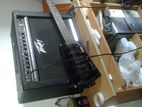

1/1 [==============================] - 0s 99ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9178362




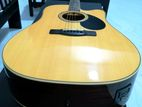

1/1 [==============================] - 0s 36ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9637561




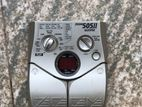

1/1 [==============================] - 0s 34ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.8603112




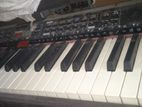

1/1 [==============================] - 0s 37ms/step
True Label: Piano
Prediction: Drums
Probability: 0.4530712




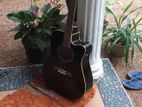

1/1 [==============================] - 0s 36ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.82925993




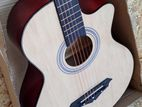

1/1 [==============================] - 0s 61ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.95122457




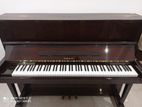

1/1 [==============================] - 0s 41ms/step
True Label: Piano
Prediction: Drums
Probability: 0.9019778




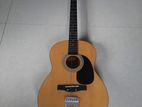

1/1 [==============================] - 0s 36ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.92311186




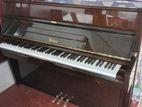

1/1 [==============================] - 0s 37ms/step
True Label: Piano
Prediction: Drums
Probability: 0.5115029




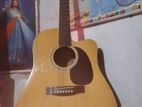

1/1 [==============================] - 0s 36ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.8782501




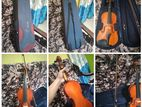

1/1 [==============================] - 0s 35ms/step
True Label: Violin
Prediction: Violin
Probability: 0.90716606




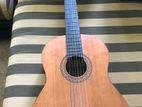

1/1 [==============================] - 0s 41ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.88084674




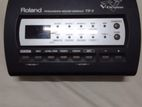

1/1 [==============================] - 0s 38ms/step
True Label: Drums
Prediction: Violin
Probability: 0.86957407




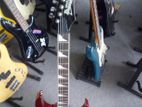

1/1 [==============================] - 0s 39ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.70576495




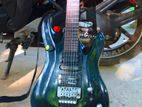

1/1 [==============================] - 0s 39ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.86202914




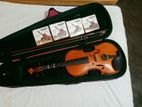

1/1 [==============================] - 0s 41ms/step
True Label: Violin
Prediction: Violin
Probability: 0.70606935




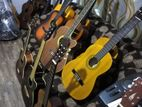

1/1 [==============================] - 0s 35ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.8127949




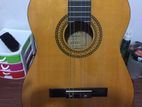

1/1 [==============================] - 0s 40ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.65992594




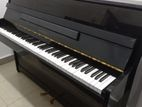

1/1 [==============================] - 0s 34ms/step
True Label: Piano
Prediction: Drums
Probability: 0.72278184




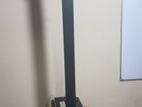

1/1 [==============================] - 0s 37ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.94529665




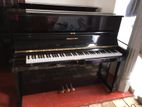

1/1 [==============================] - 0s 34ms/step
True Label: Piano
Prediction: Violin
Probability: 0.51877505




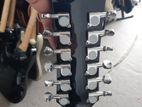

1/1 [==============================] - 0s 37ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9409455




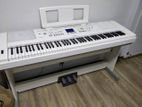

1/1 [==============================] - 0s 35ms/step
True Label: Piano
Prediction: Violin
Probability: 0.83298624




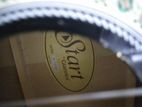

1/1 [==============================] - 0s 39ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.79472744




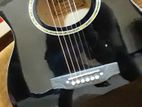

1/1 [==============================] - 0s 36ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.95724034




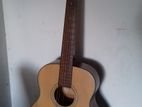

1/1 [==============================] - 0s 34ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.93263334




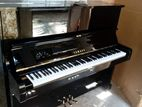

1/1 [==============================] - 0s 38ms/step
True Label: Piano
Prediction: Drums
Probability: 0.8953136




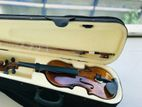

1/1 [==============================] - 0s 41ms/step
True Label: Violin
Prediction: Violin
Probability: 0.98699236




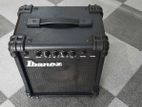

1/1 [==============================] - 0s 33ms/step
True Label: Guitar
Prediction: Drums
Probability: 0.40248144




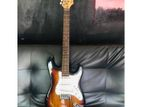

1/1 [==============================] - 0s 34ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.52425367




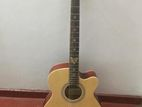

1/1 [==============================] - 0s 45ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9687053




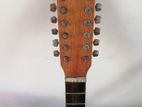

1/1 [==============================] - 0s 42ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.89240927




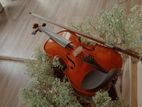

1/1 [==============================] - 0s 64ms/step
True Label: Violin
Prediction: Violin
Probability: 0.7969476




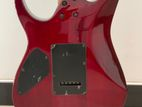

1/1 [==============================] - 0s 59ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.7053869




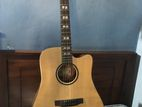

1/1 [==============================] - 0s 63ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.906205




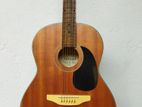

1/1 [==============================] - 0s 57ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.94191253




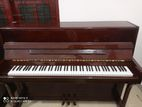

1/1 [==============================] - 0s 69ms/step
True Label: Piano
Prediction: Drums
Probability: 0.73058295




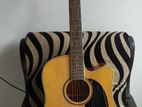

1/1 [==============================] - 0s 55ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.8661279




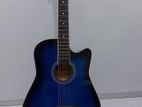

1/1 [==============================] - 0s 60ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9918234




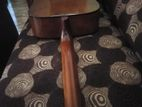

1/1 [==============================] - 0s 59ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.53414726




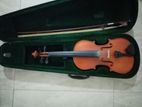

1/1 [==============================] - 0s 65ms/step
True Label: Violin
Prediction: Drums
Probability: 0.75723976




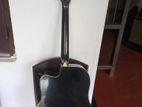

1/1 [==============================] - 0s 53ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9527321




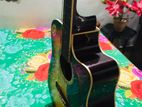

1/1 [==============================] - 0s 54ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.7460745




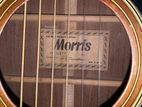

1/1 [==============================] - 0s 56ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.9255335




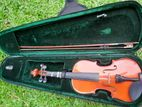

1/1 [==============================] - 0s 60ms/step
True Label: Violin
Prediction: Violin
Probability: 0.51998866




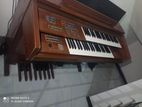

1/1 [==============================] - 0s 60ms/step
True Label: Piano
Prediction: Drums
Probability: 0.73535573




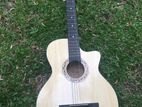

1/1 [==============================] - 0s 62ms/step
True Label: Guitar
Prediction: Violin
Probability: 0.6887902




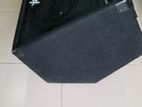

1/1 [==============================] - 0s 57ms/step
True Label: Guitar
Prediction: Drums
Probability: 0.38085327




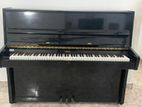

1/1 [==============================] - 0s 58ms/step
True Label: Piano
Prediction: Drums
Probability: 0.8574629




In [41]:
count = 0
class_names = ['Guitar', 'Amplifier', 'Drums', 'Piano']
y_pred = []
y_true = []
column_names=['images', 'class', 'height', 'width', 'channels', 'filesize']
df_test_gen = pd.DataFrame(test, columns=column_names)
for i, row in df_test_gen.iterrows():
    count += 1

    if count == 50:
        break
    else:
        images = row['images']
        labels = row['class']
        y_true.append(labels)
        img_path = os.path.join(path, images)
        img = image.load_img(img_path, target_size=(150, 150))
        display(Image(filename=img_path, width=300))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x.astype('float32') / 255.0
        prediction = model.predict(x)
        predicted_class = np.argmax(prediction[0])
        probability = prediction[0][predicted_class]
        y_pred.append(class_names[predicted_class])
        print("True Label:", labels)
        print("Prediction:", class_names[predicted_class])
        print("Probability:", probability)
        print("\n")







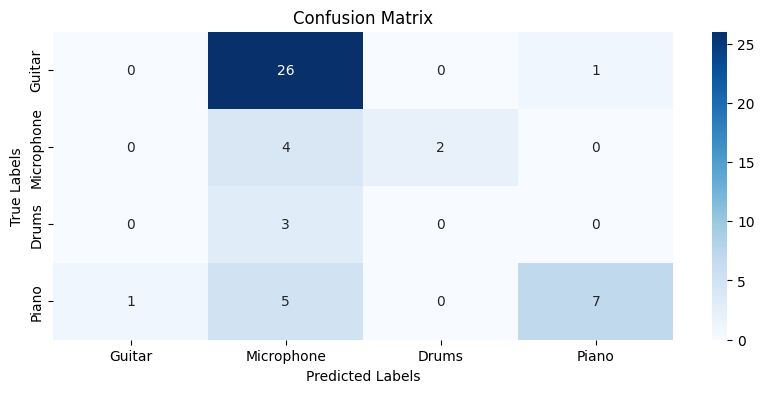

In [22]:
#imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crie a matriz de confusão
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Exiba a matriz de confusão usando um heatmap do Seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()